In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Summary Statistics

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observations :-

1. The mean is more than median for Senior Citizen and Tenure.
2. There is large difference between 75 % and max for Monthly Charges Column.

# Exploring Target Variable

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

As target variable has only 2 values, so , this is a classification problem.

In [9]:
((7043-5174)/7043)*100

26.536987079369588

Hence, there is no issue of class - imbalance.

# Data Visualizations

To check missing values

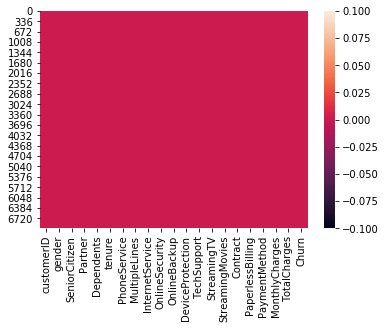

In [10]:
sns.heatmap(df.isnull())

Obsevations :-

1. The data has no missing values.

# Univariate Analysis

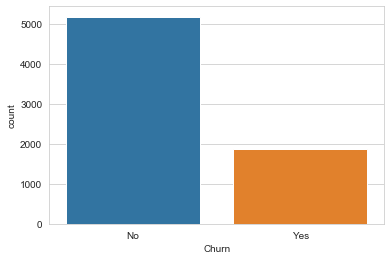

In [11]:
sns.set_style('whitegrid')
sns.countplot(df['Churn'])

Observations :-

1. Low Churn rate is present majorly in the dataset.

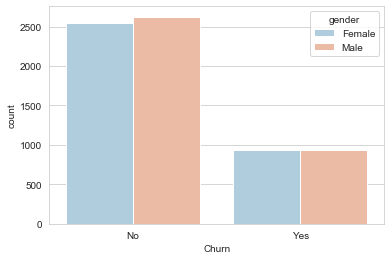

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=df,palette='RdBu_r')

Observations:-

1. Male Customers have low churn rate than Female Customers.

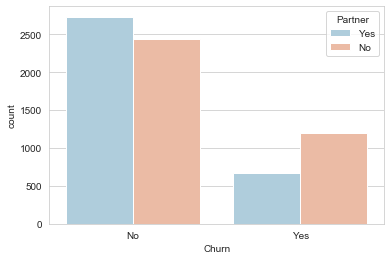

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Partner',data=df,palette='RdBu_r')

Observations :-
    
1. Customers with partner have low churn rate than customers without partner.

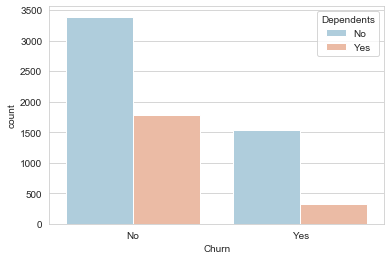

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Dependents',data=df,palette='RdBu_r')

Observations:-
    
1. Customers with no dependents have low churn rate than customers with dependents.

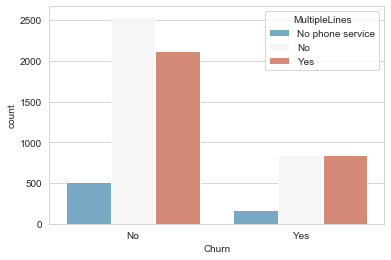

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='MultipleLines',data=df,palette='RdBu_r')

Observations:-
    
1. Customers with 0 multiple lines services have lowest churn rate.
2. Customers with multiple lines services have lower churn rate than customers with no phone services. 

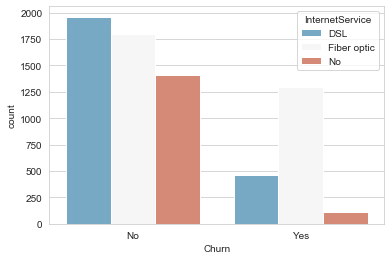

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='InternetService',data=df,palette='RdBu_r')

Observations :-
    
1. Customers with internet services of DSL have the lowest churn rate.
2. Customers with internet service of optic fiber have lower churn rate than customers with no internet services.

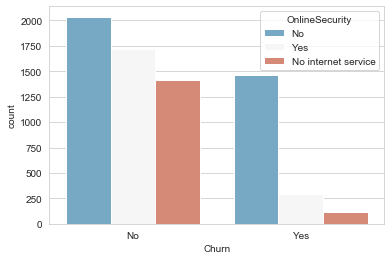

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='OnlineSecurity',data=df,palette='RdBu_r')

Observations :-
    
1. Customers have no online security have lowest churn rate.
2. Customers with online security have lower churn rate than customers with no internet services.

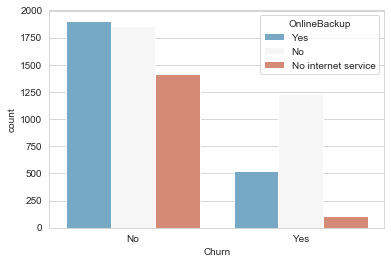

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='OnlineBackup',data=df,palette='RdBu_r')

Observations :-
    
1. Customers who keep online backup of the data have lowest churn rate.
2. Customers who do not keep online backup of the data have lower churn rate than customers with no internet service.

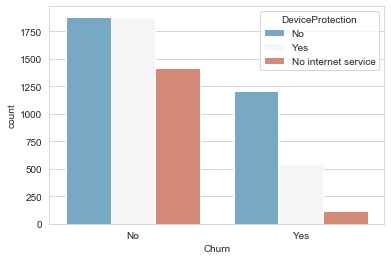

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='DeviceProtection',data=df,palette='RdBu_r')

Observations :-
    
1. Customers who have used no device protection have lowest churn rate.
2. Customers who have used device protection have lower churn rate than customers with no internet service.

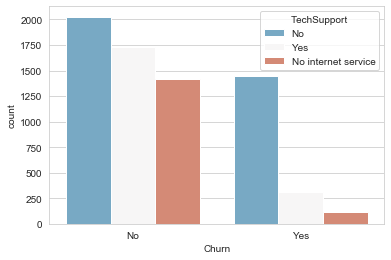

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='TechSupport',data=df,palette='RdBu_r')

Observations :-
    
1. Customers with no tech support have lowest churn rate.
2. Customers with tech tech support have lower churn rate than customers with no internet services.

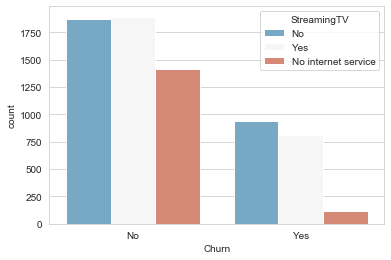

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingTV',data=df,palette='RdBu_r')

Observations :-
    
1. Customers with no streaming tv have the lowest churn rate.
2. Customers with streaming tv have lower churn rate than customers with no internet services.

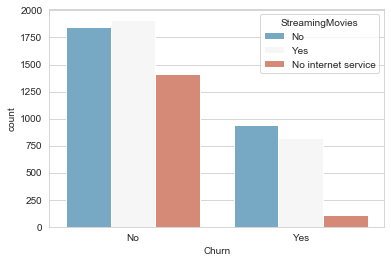

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingMovies',data=df,palette='RdBu_r')

bservations :-
    
1. Customers with no streaming  have the lowest churn rate.
2. Customers with streaming tv have lower churn rate than customers with no internet services.

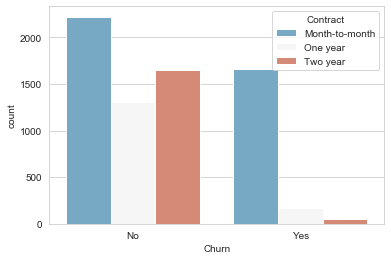

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Contract',data=df,palette='RdBu_r')

Observations :-
    
1. Customers who have month - to - month contract with company have the lowest churn rate.
2. Customers who have two years contract with company have lower churn rate than with one year of contract.

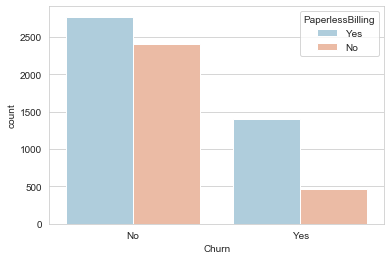

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaperlessBilling',data=df,palette='RdBu_r')

Observations :-
    
1. Customers who havemade paper less billing with company have lower churn rate than customers who have made paper used billing.

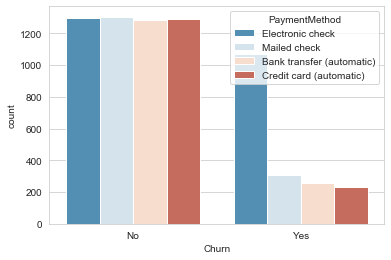

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaymentMethod',data=df,palette='RdBu_r')

Observations :-
    
1. Customers who have used electronic check as payment method have the lowest churn rate.
2. Customers who have used mailed check as payment method have lower churn rate than cusomers who have used bank transfer as 
payment method.
3. Customers who have used credit card as payment method have the highest churn rate.

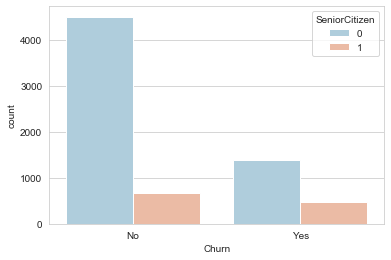

In [31]:
sns.set_style('whitegrid')
sns.countplot(hue='SeniorCitizen',x='Churn',data=df,palette='RdBu_r')

Observations :-
    
1. Non Senior Citizen Customers have lower churn rate than Senior Citizen Customers.

In [32]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64":
        df_int_types.append(i)

In [33]:
df_int_types

['SeniorCitizen', 'tenure']

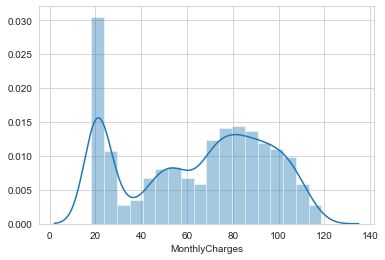

In [34]:
sns.distplot(df['MonthlyCharges'])

Observations :-
    
1. Majorly monthly charges are present in the range of 70 - 110.

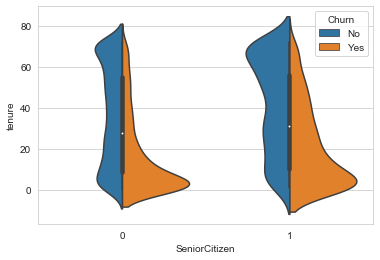

In [35]:
sns.violinplot(x='SeniorCitizen',y='tenure',data=df,hue='Churn',split=True)
plt.show()

Observations :-
    
1. Non Senior Citizen customers and senior citizen customers both have high tenures.

In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Churn']=LE.fit_transform(df['Churn'])

In [37]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
1914.5      1
826.1       1
5914.4      1
1655.35     1
1298.7      1
Name: TotalCharges, Length: 6531, dtype: int64

In [38]:
pd.set_option('display.max_rows',None)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

# Dropping of Columns

In [39]:
df.drop('customerID',axis=1,inplace=True)

# Label Encoding

In [40]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

In [41]:
df_str_types

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [42]:
df_str_types.pop()

'TotalCharges'

In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts())

1    3555
0    3488
Name: gender, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64
1    3096
0    2421
2    1526
Name: InternetService, dtype: int64
0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64
0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64
0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64
0    3875
2    1695
1    1473
Name: Contract, dtype: int64
1    4171
0    2872
Name: PaperlessBilling, dtype: int64
2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64


In [44]:
dfcorr=df.corr()
dfcorr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


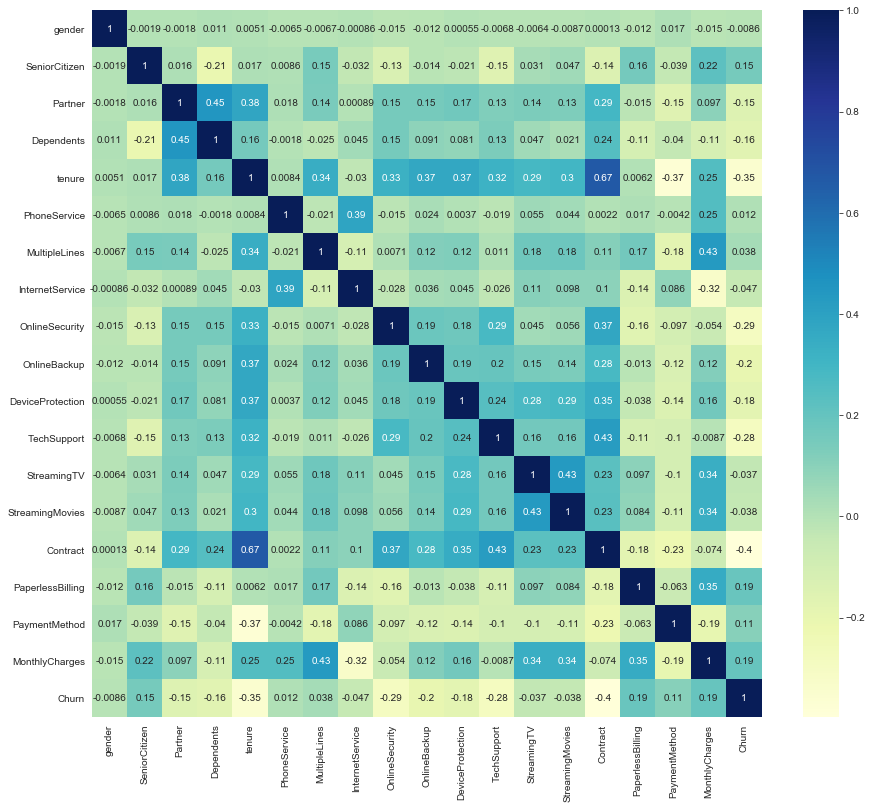

In [45]:
# Multivariate Analysis
plt.figure(figsize=(15,13))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

Observations :-
    
1. Churn is highly positively correlated with PaperlessBilling.
2. PaperlessBilling is highly negatively correlated with Contract.
3. Contract is highly positively correlated with tenure.
4. Contract is highly negatively correlated with Churn.

# Plotting Outliers

In [46]:
df.shape

(7043, 20)

gender                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
SeniorCitizen        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Partner               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Dependents           AxesSubplot(0.606034,0.71587;0.133621x0.16413)
tenure               AxesSubplot(0.766379,0.71587;0.133621x0.16413)
PhoneService           AxesSubplot(0.125,0.518913;0.133621x0.16413)
MultipleLines       AxesSubplot(0.285345,0.518913;0.133621x0.16413)
InternetService      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
OnlineSecurity      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
OnlineBackup        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
DeviceProtection       AxesSubplot(0.125,0.321957;0.133621x0.16413)
TechSupport         AxesSubplot(0.285345,0.321957;0.133621x0.16413)
StreamingTV          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
StreamingMovies     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Contract            AxesSubplot(0.766379,0.32195

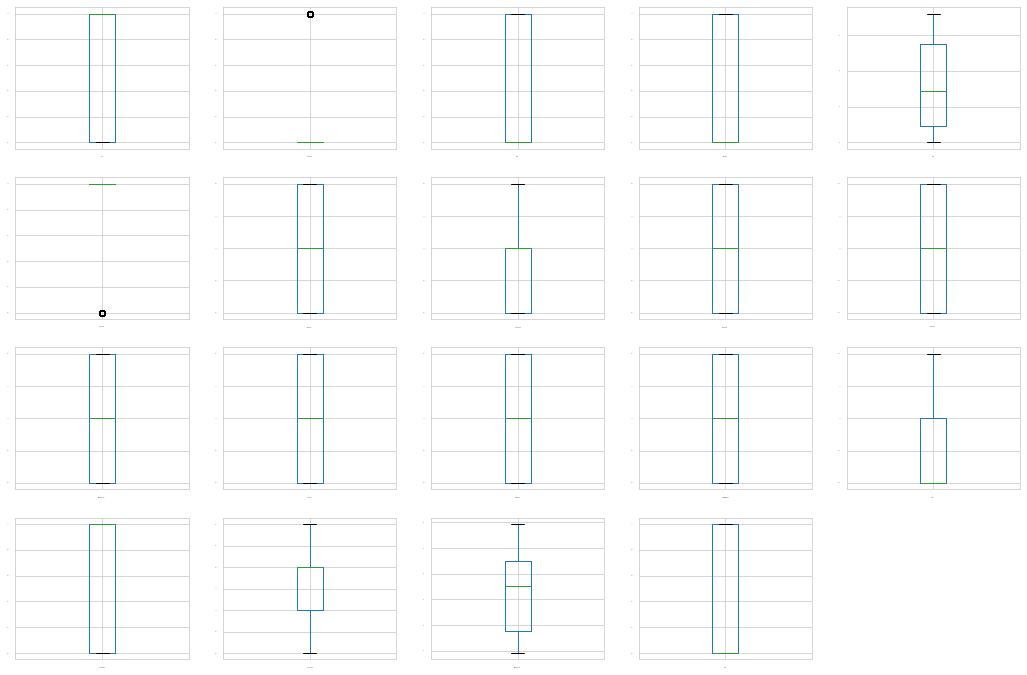

In [47]:
df.plot(kind='box',subplots=True,layout=(4,5),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Senior Citizen and Phone Service have outliers.

In [48]:
pd.set_option('display.max_rows',None)
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

# Dropping of Column

In [49]:
df.drop('TotalCharges',axis=1,inplace=True)

# Removing Outliers

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [51]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [52]:
df_new.shape

(6361, 19)

In [53]:
df.shape

(7043, 19)

In [54]:
# 682 rows are removed as outliers

In [55]:
((7043-6361)/7043)*100

9.683373562402386

In [56]:
df=df_new

In [57]:
df.shape

(6361, 19)

# To check skewness

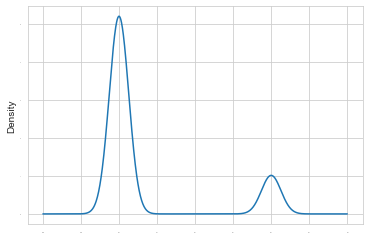

In [58]:
df['SeniorCitizen'].plot(kind='density',sharex=False,fontsize=1)

Observations :-
    
1. Senior Citizen is right skewed. 

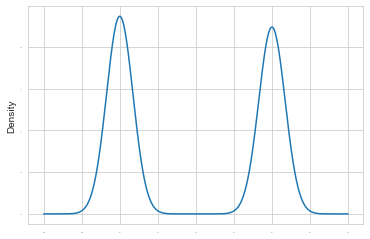

In [59]:
df['Partner'].plot(kind='density',sharex=False,fontsize=1)

Observations :-
    
1. Partner is normally distributed. 

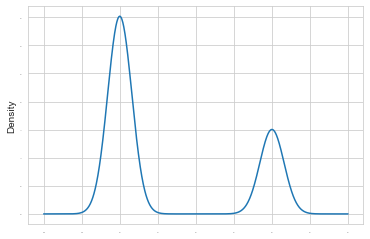

In [60]:
df['Dependents'].plot(kind='density',sharex=False,fontsize=1)

Observations :-
    
1. Dependents is right skewed. 

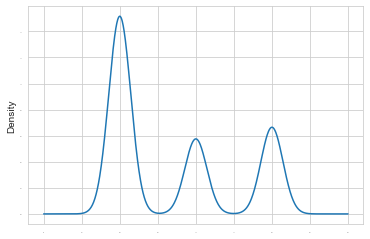

In [61]:
df['Contract'].plot(kind='density',sharex=False,fontsize=1)

Observations :-
    
1. Contract is right skewed. 

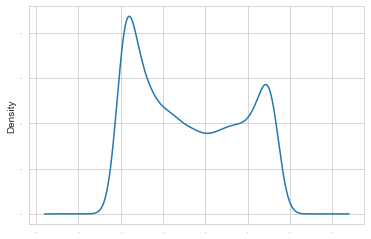

In [62]:
df['tenure'].plot(kind='density',sharex=False,fontsize=1)

Observations :-
    
1. tenure is normally distributed. 

In [63]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
Churn               1.053055
dtype: float64

In [64]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [65]:
list=['SeniorCitizen','Dependents','Contract']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [66]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.343999
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
Churn               1.053055
dtype: float64

# Train Test Split

In [67]:
x=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges']]
y=df['Churn']

# Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [69]:
x=pd.DataFrame(x)

In [70]:
x.columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges']

In [71]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.8014285714285714
[[923 118]
 [160 199]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.55      0.59       359

    accuracy                           0.80      1400
   macro avg       0.74      0.72      0.73      1400
weighted avg       0.79      0.80      0.80      1400

Accuracy score of Logistic Regression is:
0.7907142857142857
[[904 119]
 [174 203]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1023
           1       0.63      0.54      0.58       377

    accuracy                           0.79      1400
   macro avg       0.73      0.71      0.72      1400
weighted avg       0.78      0.79      0.79      1400

Accuracy score of Logistic Regression is:
0.8078571428571428
[[927 102]
 [167 204]]
              precision    recall  f1-score   support

           0       0.85      0.90      

Best accuracy is 0.8357142857142857 on Random_state 41

# Algorithms

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=41)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.8357142857142857
[[937  85]
 [145 233]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1022
           1       0.73      0.62      0.67       378

    accuracy                           0.84      1400
   macro avg       0.80      0.77      0.78      1400
weighted avg       0.83      0.84      0.83      1400



In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.7507142857142857
[[852 170]
 [179 199]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1022
           1       0.54      0.53      0.53       378

    accuracy                           0.75      1400
   macro avg       0.68      0.68      0.68      1400
weighted avg       0.75      0.75      0.75      1400



In [75]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8357142857142857
[[937  85]
 [145 233]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1022
           1       0.73      0.62      0.67       378

    accuracy                           0.84      1400
   macro avg       0.80      0.77      0.78      1400
weighted avg       0.83      0.84      0.83      1400



In [76]:
svm=SVC()
svm.fit(x_train,y_train)
predsvc=svm.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvc)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of svm is:
0.8242857142857143
[[957  65]
 [181 197]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1022
           1       0.75      0.52      0.62       378

    accuracy                           0.82      1400
   macro avg       0.80      0.73      0.75      1400
weighted avg       0.82      0.82      0.81      1400



In [77]:
bnb=GaussianNB()
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
print('Accuracy score of BinomialNB','is:')
accu_score=accuracy_score(y_test,predbnb)
print(accuracy_score(y_test,predbnb))
print(confusion_matrix(y_test,predbnb))
print(classification_report(y_test,predbnb))

Accuracy score of BinomialNB is:
0.7935714285714286
[[819 203]
 [ 86 292]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1022
           1       0.59      0.77      0.67       378

    accuracy                           0.79      1400
   macro avg       0.75      0.79      0.76      1400
weighted avg       0.82      0.79      0.80      1400



In [78]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.8142857142857143
[[935  87]
 [173 205]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1022
           1       0.70      0.54      0.61       378

    accuracy                           0.81      1400
   macro avg       0.77      0.73      0.74      1400
weighted avg       0.81      0.81      0.81      1400



In [79]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.825
[[941  81]
 [164 214]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1022
           1       0.73      0.57      0.64       378

    accuracy                           0.82      1400
   macro avg       0.79      0.74      0.76      1400
weighted avg       0.82      0.82      0.82      1400



Logistic Regression and K - Neighbors Classifier are the best algorithms.

# Cross - Validation Scores

In [80]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.80754124 0.81289308 0.78537736 0.80581761 0.80345912]
0.8030176821947859 0.009350952739435633


In [81]:
from sklearn.model_selection import cross_val_score
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.76983504 0.76022013 0.74685535 0.74764151 0.75550314]
0.7560110322271463 0.008520011553889555


In [82]:
list1=[0.8357142857142857,0.8357142857142857]
list2=[0.8030176821947859,0.7560110322271463]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.03269660351949988, 0.07970325348713947]


# Hyper Parameter Tuning

In [83]:
knn=KNeighborsClassifier()
grid_param={'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,8,10],'leaf_size':[30,40,50]}
gd_sr=GridSearchCV(estimator=knn,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [5, 8, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [84]:
gd_sr.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_neighbors': 10,
 'weights': 'uniform'}

In [85]:
knn=KNeighborsClassifier(algorithm = 'ball_tree',
 leaf_size=30,
 n_neighbors= 10,
 weights= 'uniform')
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8357142857142857
[[937  85]
 [145 233]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1022
           1       0.73      0.62      0.67       378

    accuracy                           0.84      1400
   macro avg       0.80      0.77      0.78      1400
weighted avg       0.83      0.84      0.83      1400



Accuracy of K- Neighbors Classifier has remained same as 83.571 % with hyper parameter tuning.

# AOC - ROC Curve

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [87]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [88]:
y_pred_prob

array([0.9, 0.7, 0.6, ..., 0. , 0.3, 0.1])

In [89]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [90]:
fpr

array([0.00000000e+00, 9.78473581e-04, 9.78473581e-03, 2.54403131e-02,
       5.18590998e-02, 9.19765166e-02, 1.49706458e-01, 2.39726027e-01,
       3.50293542e-01, 4.78473581e-01, 6.68297456e-01, 1.00000000e+00])

In [91]:
tpr

array([0.        , 0.01058201, 0.05820106, 0.14814815, 0.31481481,
       0.48412698, 0.63227513, 0.74603175, 0.85449735, 0.9047619 ,
       0.95502646, 1.        ])

In [92]:
thresholds

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

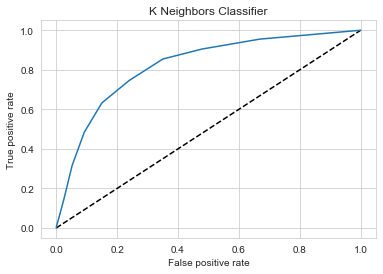

In [93]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='K Nearest Neighbors')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('K Neighbors Classifier')
plt.show()

Observations :-

1. As the line is moving towards 1, so we can conclude that we have developed good model.

# Saving the model

In [94]:
import joblib

In [95]:
joblib.dump(knn,"knn_CustomerChurn.obj")

['knn_CustomerChurn.obj']